In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
mouse_results = pd.merge(study_results, mouse_metadata, on="Mouse ID")
mouse_results_time = mouse_results.loc[mouse_results["Timepoint"] == 0, :]
mouse_results_time

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0        b128          0                45.0                 0    Capomulin   
10       f932          0                45.0                 0     Ketapril   
11       g107          0                45.0                 0     Ketapril   
19       a457          0                45.0                 0     Ketapril   
22       c819          0                45.0                 0     Ketapril   
...       ...        ...                 ...               ...          ...   
1848     t565          0                45.0                 0    Capomulin   
1858     i557          0                45.0                 0    Capomulin   
1868     m957          0                45.0                 0    Capomulin   
1878     f966          0                45.0                 0    Capomulin   
1883     m601          0                45.0                 0    Capomulin   

         Sex  Age_months  Weight (g)  
0     Female           9          22  
10      Male          15          29  
11    Female           2          29  
19    Female          11          30  
22      Male          21          25  
...      ...         ...         ...  
1848  Female          20          17  
1858  Female           1          24  
1868  Female           3          19  
1878    Male          16          17  
1883    Male          22          17  

[250 rows x 8 columns]

In [3]:
#number of unique mice
len(mouse_results["Mouse ID"].unique())

249

In [4]:
#finding the duplicated rows
mouse_dupes = mouse_results[mouse_results.duplicated()]
mouse_dupes

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
861     g989          0                45.0                 0     Propriva   

        Sex  Age_months  Weight (g)  
861  Female          21          26

In [5]:
duped_info = mouse_results.loc[mouse_results["Mouse ID"] == "g989", :]
duped_info

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
860     g989          0           45.000000                 0     Propriva   
861     g989          0           45.000000                 0     Propriva   
862     g989          5           48.786801                 0     Propriva   
863     g989          5           47.570392                 0     Propriva   
864     g989         10           51.745156                 0     Propriva   
865     g989         10           49.880528                 0     Propriva   
866     g989         15           51.325852                 1     Propriva   
867     g989         15           53.442020                 0     Propriva   
868     g989         20           55.326122                 1     Propriva   
869     g989         20           54.657650                 1     Propriva   
870     g989         25           56.045564                 1     Propriva   
871     g989         30           59.082294                 1     Propriva   
872     g989         35           62.570880                 2     Propriva   

        Sex  Age_months  Weight (g)  
860  Female          21          26  
861  Female          21          26  
862  Female          21          26  
863  Female          21          26  
864  Female          21          26  
865  Female          21          26  
866  Female          21          26  
867  Female          21          26  
868  Female          21          26  
869  Female          21          26  
870  Female          21          26  
871  Female          21          26  
872  Female          21          26

In [6]:
mouse_nodupe = mouse_results_time[mouse_results_time["Mouse ID"] != "g989"]

In [14]:
#updated unique IDs
len(mouse_nodupe["Mouse ID"].unique())

248

In [15]:
#updated df
mouse_nodupe.head(5)

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0      b128          0                45.0                 0    Capomulin   
10     f932          0                45.0                 0     Ketapril   
11     g107          0                45.0                 0     Ketapril   
19     a457          0                45.0                 0     Ketapril   
22     c819          0                45.0                 0     Ketapril   

       Sex  Age_months  Weight (g)  
0   Female           9          22  
10    Male          15          29  
11  Female           2          29  
19  Female          11          30  
22    Male          21          25

In [16]:
#setting up summary stats
mouse_mean = mouse_results.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
mouse_median = mouse_results.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
mouse_var = mouse_results.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
mouse_std = mouse_results.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
mouse_sem = mouse_results.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

In [17]:
stat_part = pd.concat([mouse_mean, mouse_median, mouse_var, mouse_std, mouse_sem], axis=1)

In [18]:
stat_part.columns = ["Tumor Volume Mean", "Tumor Volume Median", "Tumor Volume Variance", "Tumor Volume Std. Dev.", "Tumor Volume Std. Err."]

In [19]:
stat_part

Tumor Volume Mean  Tumor Volume Median  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.322552            50.854632              42.351070   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor Volume Std. Dev.  Tumor Volume Std. Err.  
Drug Regimen                                                  
Capomulin                   4.994774                0.329346  
Ceftamin                    6.268188                0.469821  
Infubinol                   6.567243                0.492236  
Ketapril                    8.279709                0.603860  
Naftisol                    8.134708                0.596466  
Placebo                     7.821003                0.581331  
Propriva                    6.507770                0.512884  
Ramicane                    4.846308                0.320955  
Stelasyn                    7.710419                0.573111  
Zoniferol                   6.966589                0.516398

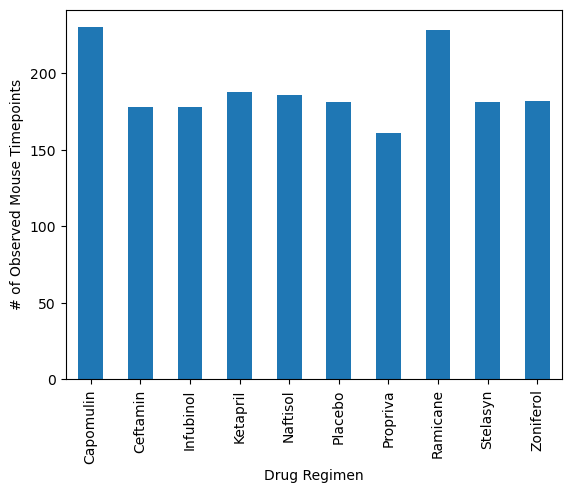

In [42]:
#bar using Pandas
data_bar = mouse_results.groupby("Drug Regimen").count()["Mouse ID"]
panda_bar = pd.DataFrame(data_bar)
panda_bar.plot(kind="bar", legend=False, ylabel="# of Observed Mouse Timepoints")
plt.show()

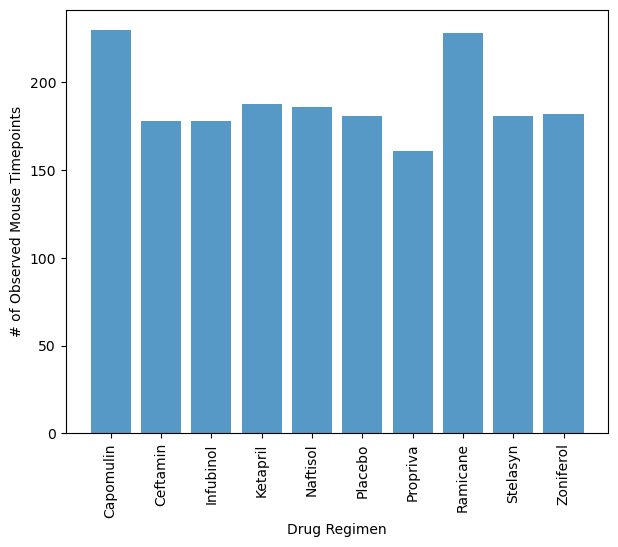

In [43]:
#bar using pyplot
x_axis = np.arange(len(data_bar))
tick_locations = [value+0.4 for value in x_axis]

reset = panda_bar.reset_index()
plt.figure(figsize=(7,5.5))
plt.bar(x_axis, panda_bar["Mouse ID"], alpha=0.75, align="edge")
plt.xticks(tick_locations, reset["Drug Regimen"], rotation="vertical")

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

In [22]:
#pie parameters + number of rows per each
mouse_gender = mouse_nodupe.groupby("Sex").count()
gender_list = list(mouse_gender.index)
gender_count = [mouse_gender["Mouse ID"]]
gcount = pd.DataFrame(gender_count)
gcount

Sex       Female  Male
Mouse ID     123   125

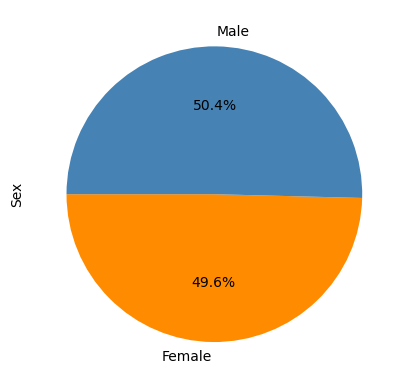

In [44]:
#pie in Pandas
mouse_gender["Mouse ID"].plot(kind="pie", y=gender_count, autopct="%1.1f%%", 
                              startangle=180, colors = ["darkorange", "steelblue"], ylabel="Sex")
plt.show()

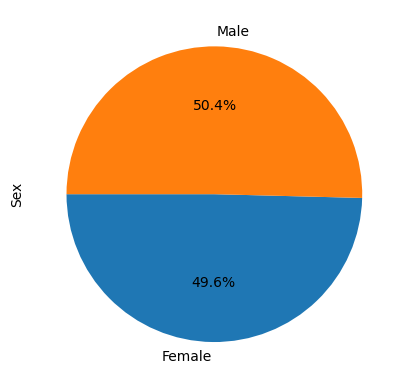

In [45]:
#pie in pyplot
plt.pie(gcount.loc["Mouse ID", :], labels=gender_list, autopct="%1.1f%%", startangle=180)
plt.ylabel("Sex")
plt.show()

In [25]:
#setting up for timepoints
capo_df = mouse_results.loc[mouse_results["Drug Regimen"] == "Capomulin",:]
rami_df = mouse_results.loc[mouse_results["Drug Regimen"] == "Ramicane", :]
infu_df = mouse_results.loc[mouse_results["Drug Regimen"] == "Infubinol", :]
ceft_df = mouse_results.loc[mouse_results["Drug Regimen"] == "Ceftamin", :]
#empty tumor list (unfortunately I could not figure out the for loop so I will be doing some space
#-consuming copy-pasting with variable find-and-replacement
tumor_list = []

In [26]:
#Capomulin df for stats
capo_last = capo_df.groupby("Mouse ID").max()["Timepoint"]
capo_last_vol = pd.DataFrame(capo_last)
capo_merge = pd.merge(capo_last_vol, mouse_results, on=("Mouse ID","Timepoint"), how="left")
capo_merge.head(5)

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128         45           38.982878                 2    Capomulin   
1     b742         45           38.939633                 0    Capomulin   
2     f966         20           30.485985                 0    Capomulin   
3     g288         45           37.074024                 1    Capomulin   
4     g316         45           40.159220                 2    Capomulin   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1    Male           7          21  
2    Male          16          17  
3    Male           3          19  
4  Female          22          22

In [34]:
#Capo stats
capo_tumor = capo_merge["Tumor Volume (mm3)"]

quartiles = capo_tumor.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Capomulin's potential outliers: lower: {lower_bound}, upper: {upper_bound}")

Capomulin's potential outliers: lower: 20.70456164999999, upper: 51.83201549


In [32]:
#Ramicane df for stats
rami_last = rami_df.groupby("Mouse ID").max()["Timepoint"]
rami_last_vol = pd.DataFrame(rami_last)
rami_merge = pd.merge(rami_last_vol, mouse_results, on=("Mouse ID","Timepoint"), how="left")
rami_merge.head(5)

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     a411         45           38.407618                 1     Ramicane   
1     a444         45           43.047543                 0     Ramicane   
2     a520         45           38.810366                 1     Ramicane   
3     a644         45           32.978522                 1     Ramicane   
4     c458         30           38.342008                 2     Ramicane   

      Sex  Age_months  Weight (g)  
0    Male           3          22  
1  Female          10          25  
2    Male          13          21  
3  Female           7          17  
4  Female          23          20

In [33]:
#Rami stats
rami_tumor = rami_merge["Tumor Volume (mm3)"]

quartiles2 = rami_tumor.quantile([.25,.5,.75])
lowerq2 = quartiles2[0.25]
upperq2 = quartiles2[0.75]
iqr2 = upperq2-lowerq2
lower_bound2 = lowerq2 - (1.5*iqr2)
upper_bound2 = upperq2 + (1.5*iqr2)

print(f"Ramicane's potential outliers: lower: {lower_bound2}, upper: {upper_bound2}")

Ramicane's potential outliers: lower: 17.912664470000003, upper: 54.30681135


In [30]:
#Infubinol df for stats
infu_last = infu_df.groupby("Mouse ID").max()["Timepoint"]
infu_last_vol = pd.DataFrame(infu_last)
infu_merge = pd.merge(infu_last_vol, mouse_results, on=("Mouse ID","Timepoint"), how="left")
infu_merge.head(5)

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     a203         45           67.973419                 2    Infubinol   
1     a251         45           65.525743                 1    Infubinol   
2     a577         30           57.031862                 2    Infubinol   
3     a685         45           66.083066                 3    Infubinol   
4     c139         45           72.226731                 2    Infubinol   

      Sex  Age_months  Weight (g)  
0  Female          20          23  
1  Female          21          25  
2  Female           6          25  
3    Male           8          30  
4    Male          11          28

In [31]:
#Infu stats
infu_tumor = infu_merge["Tumor Volume (mm3)"]

quartiles3 = infu_tumor.quantile([.25,.5,.75])
lowerq3 = quartiles3[0.25]
upperq3 = quartiles3[0.75]
iqr3 = upperq3-lowerq3
lower_bound3 = lowerq3 - (1.5*iqr3)
upper_bound3 = upperq3 + (1.5*iqr3)

print(f"Ramicane's potential outliers: lower: {lower_bound3}, upper: {upper_bound3}")

Ramicane's potential outliers: lower: 36.83290494999999, upper: 82.74144559000001


In [35]:
#Ceftamin df for stats
ceft_last = ceft_df.groupby("Mouse ID").max()["Timepoint"]
ceft_last_vol = pd.DataFrame(ceft_last)
ceft_merge = pd.merge(ceft_last_vol, mouse_results, on=("Mouse ID","Timepoint"), how="left")
ceft_merge.head(5)

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     a275         45           62.999356                 3     Ceftamin   
1     b447          0           45.000000                 0     Ceftamin   
2     b487         25           56.057749                 1     Ceftamin   
3     b759         30           55.742829                 1     Ceftamin   
4     f436         15           48.722078                 2     Ceftamin   

      Sex  Age_months  Weight (g)  
0  Female          20          28  
1    Male           2          30  
2  Female           6          28  
3  Female          12          25  
4  Female           3          25

In [36]:
#Ceft stats
ceft_tumor = ceft_merge["Tumor Volume (mm3)"]

quartiles4 = ceft_tumor.quantile([.25,.5,.75])
lowerq4 = quartiles4[0.25]
upperq4 = quartiles4[0.75]
iqr4 = upperq4-lowerq4
lower_bound4 = lowerq4 - (1.5*iqr4)
upper_bound4 = upperq4 + (1.5*iqr4)

print(f"Ramicane's potential outliers: lower: {lower_bound4}, upper: {upper_bound4}")

Ramicane's potential outliers: lower: 25.355449580000002, upper: 87.66645829999999


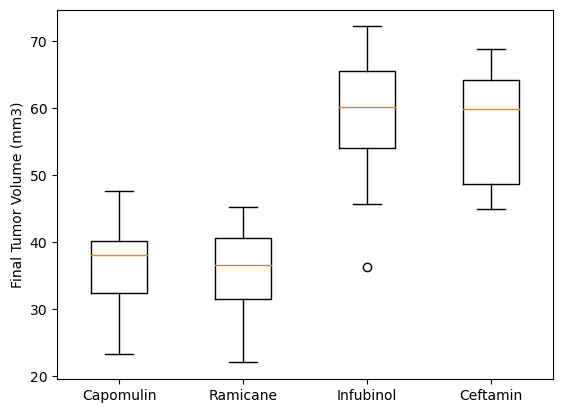

In [46]:
#box plot
tumor_list = [capo_tumor, rami_tumor, infu_tumor, ceft_tumor]
thing1, boxthing = plt.subplots()
boxthing.boxplot(tumor_list, labels=["Capomulin","Ramicane","Infubinol","Ceftamin",])
boxthing.set_ylabel("Final Tumor Volume (mm3)")
plt.show()

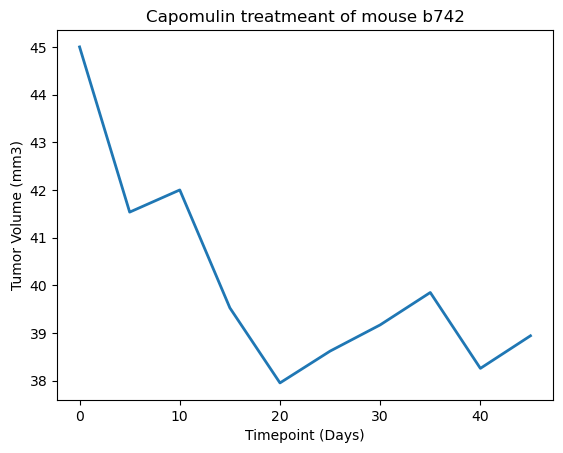

In [48]:
#line plot for b742
line_df = capo_df.loc[capo_df["Mouse ID"] == "b742"]

line_data = line_df["Timepoint"]
tumor = line_df["Tumor Volume (mm3)"]

plt.title("Capomulin treatmeant of mouse b742")
plt.plot(line_data, tumor, linewidth=2, markersize=12)
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

C:\Users\epicr\AppData\Local\Temp\ipykernel_19248\1258008981.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  capo_mean = capo_df.groupby(["Mouse ID"]).mean()


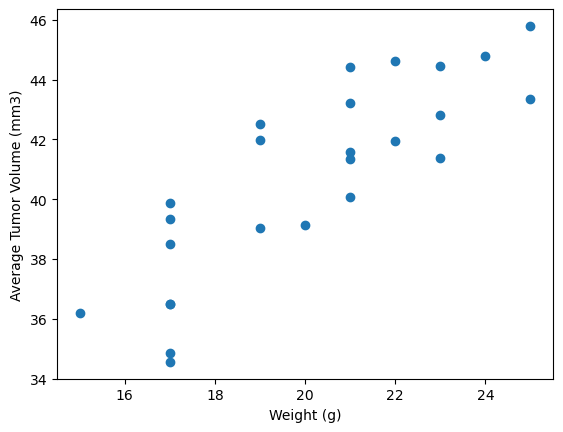

In [50]:
#scatter plot for b742
capo_mean = capo_df.groupby(["Mouse ID"]).mean()
plt.scatter(capo_mean["Weight (g)"],capo_mean["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()

In [54]:
#finding correlation coeff for model
corr = round(st.pearsonr(capo_mean["Weight (g)"], capo_mean["Tumor Volume (mm3)"])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr}")

The correlation between mouse weight and average tumor volume is 0.84


In [56]:
#generating the model
mouse_lm = st.linregress(capo_mean["Weight (g)"],capo_mean["Tumor Volume (mm3)"])
mouse_lm

LinregressResult(slope=0.9544396890241049, intercept=21.552160532685008, rvalue=0.8419363424694721, pvalue=1.3225722434712404e-07, stderr=0.12754359033201323, intercept_stderr=2.5909876867683455)

In [59]:
slope_lm = 0.9544396890241049
intercept_lm = 21.552160532685008

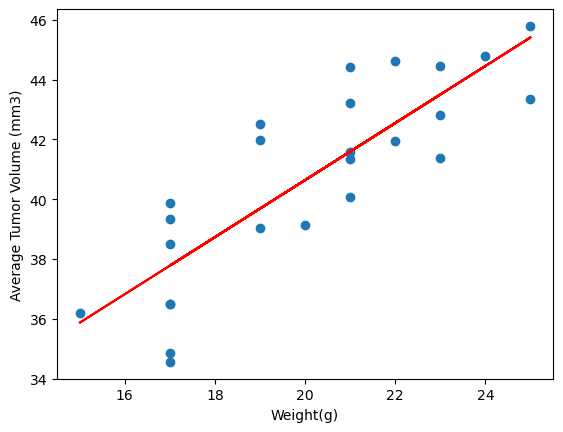

In [62]:
y_values = capo_mean["Weight (g)"] * slope_lm + intercept_lm
plt.scatter(capo_mean["Weight (g)"], capo_mean["Tumor Volume (mm3)"])
plt.plot(capo_mean["Weight (g)"], y_values, color="red")
plt.xlabel("Weight(g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()